## PMF of age

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.

Instructions

1. Extract the variable `'AGE'` from the DataFrame `brfss` and assign it to `age`.
2. Get the PMF of `age` and plot it as a bar chart.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf

brfss = pd.read_hdf('Behavioral_Risk_Factor_Surveillance_System_BRFSS.hdf5')

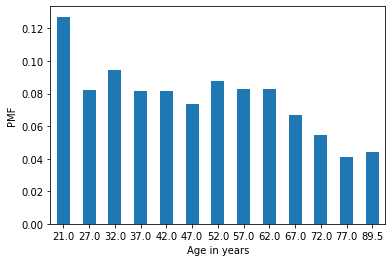

In [2]:
# Extract age
age = brfss['AGE']

# Plot the PMF
# pmf_age = Pmf(age)
pmf_age = Pmf.from_seq(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## Scatter plot

Now let's make a scatterplot of `weight` versus `age`. To make the code run faster, I've selected only the first 1000 rows from the `brfss` DataFrame.

`weight` and `age` have already been extracted for you. Your job is to use `plt.plot()` to make a scatter plot.

Instructions

1. Make a scatter plot of `weight` and `age` with format string `'o'` and `alpha=0.1`.

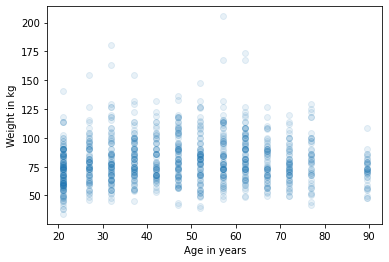

In [3]:
# Select the first 1000 respondents
brfss_1000 = brfss[:1000]

# Extract age and weight
age = brfss_1000['AGE']
weight = brfss_1000['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

## Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly. Recall how Allen jittered `height` and `weight` in the video:

```
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
```

Instructions

1. Add random noise to `age` with mean `0` and standard deviation `2.5`.
2. Make a scatter plot between `weight` and `age` with marker size `5` and `alpha=0.2`. Be sure to also specify `'o'`.

In [4]:
import numpy as np

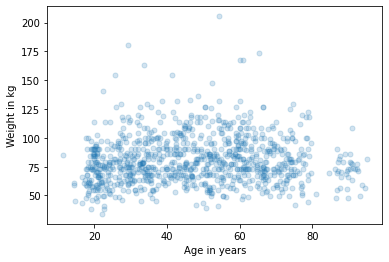

In [11]:
# Select the first 1000 respondents
brfss_1000 = brfss[:1000]

# Add jittering to age
age = brfss_1000['AGE'] + np.random.normal(0, 2.5, size=len(brfss_1000))
# Extract weight
weight = brfss_1000['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Height and weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of `'AGE'` and `'WTKG3'` in the video, with the y-axis on a logarithmic scale:

```
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
```

Instructions

1. Fill in the parameters of `.boxplot()` to plot the distribution of weight (`'WTKG3'`) in each height (`'_HTMG10'`) group. Specify `whis=10`, just as was done in the video.
2. Add a line to plot the y-axis on a logarithmic scale.

In [14]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]

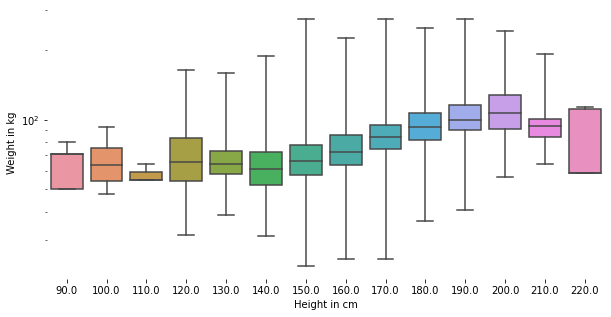

In [15]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## Distribution of income

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

Instructions

1. Extract `'INCOME2'` from the `brfss` DataFrame and assign it to `income`.
2. Plot the PMF of `income` as a bar chart.

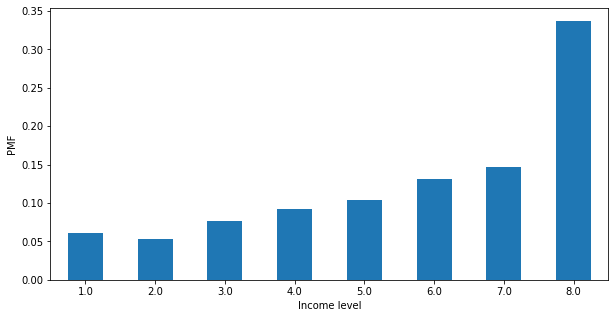

In [16]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
# Pmf(income).bar()
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

## ncome and height

Let's now use a violin plot to visualize the relationship between income and height.

Instructions

1. Create a violin plot to plot the distribution of height (`'HTM4'`) in each income (`'INCOME2'`) group. Specify `inner=None` to simplify the plot.

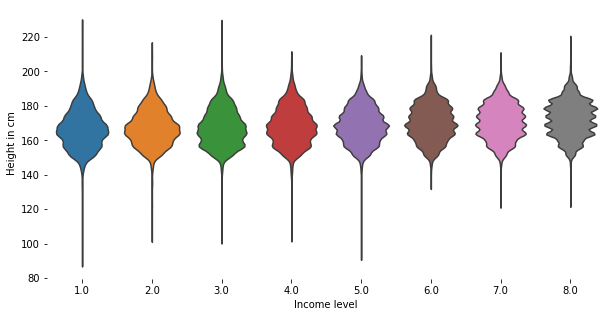

In [18]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Computing correlations

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

Instructions

1. From the `brfss` DataFrame, select the columns `'AGE'`, `'INCOME2'`, and `'_VEGESU1'`.
2. Compute the correlation matrix for these variables.

In [19]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.015158,-0.009834
INCOME2,-0.015158,1.000000,0.119670
_VEGESU1,-0.009834,0.119670,1.000000


## Interpreting correlations

In the previous exercise, the correlation between income and vegetable consumption is about `0.12`. The correlation between age and vegetable consumption is about `-0.01`.

Which of the following are correct interpretations of these results:

- _A_: People with higher incomes eat more vegetables.
- _B_: The relationship between income and vegetable consumption is linear.
- _C_: Older people eat more vegetables.
- _D_: There could be a strong nonlinear relationship between age and vegetable consumption.

A and D only.

## Income and vegetables

As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

Instructions

1. Extract the columns `'INCOME2'` and `'_VEGESU1'` from `subset` into `xs` and `ys` respectively.
2. Compute the simple linear regression of these variables.

In [24]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs, ys)
res

LinregressResult(slope=0.06988048092105019, intercept=1.5287786243363106, rvalue=0.11967005884864107, pvalue=1.378503916247615e-238, stderr=0.002110976356332332)

## Fit a line

Continuing from the previous exercise:

- Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and
- `res` contains the results of a simple linear regression of `ys` onto `xs`.

Now, you're going to compute the line of best fit. NumPy has been imported for you as `np`.

Instructions

1. Set `fx` to the minimum and maximum of `xs`, stored in a NumPy array.
2. Set `fy` to the points on the fitted line that correspond to the `fx`.

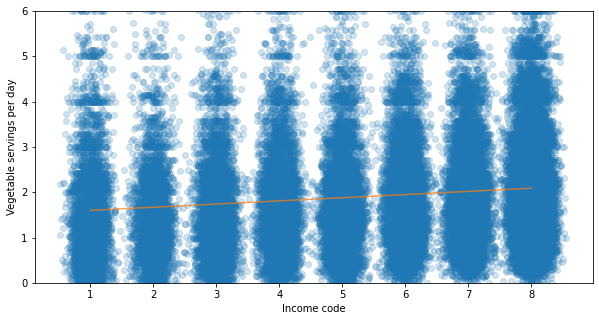

In [26]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()